In [3]:
import pandas as pd
fish = pd.read_csv('https://bit.ly/fish_csv_data')
fish.head()

,Species,Weight,Length,Diagonal,Height,Width
0,Bream,242.0,25.4,30.0,11.5200,4.0200
1,Bream,290.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,26.5,31.1,12.3778,4.6961
3,Bream,363.0,29.0,33.5,12.7300,4.4555
4,Bream,430.0,29.0,34.0,12.4440,5.1340


In [4]:
fish_input = fish[['Weight', 'Length', 'Diagonal', 'Height', 'Width']].to_numpy()
fish_target = fish['Species'].to_numpy()

In [5]:
import numpy as np
from sklearn.model_selection import train_test_split

train_input, test_input, train_target, test_target, = train_test_split(
    fish_input, fish_target
)

In [6]:
# 전처리 - 표준 점수로 변환하기.
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
ss.fit(train_input)
train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)

In [7]:
from sklearn.linear_model import SGDClassifier

In [10]:
sc = SGDClassifier(loss='log_loss', max_iter=100) # 로지스틱 함수(아진 크로스 엔트로피 함수) OVR - One Versys Rest
sc.fit(train_scaled, train_target) # 내부적으로 하나씩 꺼내서 사용!

print(sc.score(train_scaled, train_target)) # 학습세트
print(sc.score(test_scaled, test_target)) # 테스트 세트

0.7647058823529411
0.7


In [12]:
# partial_fit(...) : 추가 학습
sc.partial_fit(train_scaled, train_target)
print(sc.score(train_scaled, train_target)) # 학습 세트
print(sc.score(test_scaled, test_target)) # 테스트 세트

0.9327731092436975
0.8


In [19]:
sc = SGDClassifier(loss='log_loss', max_iter=10)

train_score = []
test_score = []

In [20]:
classes = np.unique(train_target)

for _ in range(0, 300):
    sc.partial_fit(train_scaled, train_target, classes=classes)

    train_score.append(sc.score(train_scaled, train_target))
    test_score.append(sc.score(test_scaled, test_target))

In [21]:
print(test_score)

[0.7, 0.65, 0.775, 0.775, 0.675, 0.725, 0.675, 0.8, 0.65, 0.775, 0.825, 0.775, 0.75, 0.65, 0.85, 0.85, 0.675, 0.75, 0.775, 0.675, 0.725, 0.75, 0.7, 0.8, 0.75, 0.75, 0.675, 0.7, 0.825, 0.775, 0.625, 0.75, 0.825, 0.825, 0.825, 0.75, 0.775, 0.675, 0.825, 0.675, 0.825, 0.825, 0.7, 0.85, 0.825, 0.775, 0.85, 0.65, 0.85, 0.775, 0.875, 0.875, 0.875, 0.875, 0.85, 0.85, 0.85, 0.825, 0.8, 0.85, 0.85, 0.85, 0.85, 0.825, 0.825, 0.8, 0.8, 0.875, 0.825, 0.8, 0.825, 0.8, 0.775, 0.8, 0.875, 0.85, 0.8, 0.825, 0.875, 0.875, 0.875, 0.85, 0.8, 0.85, 0.825, 0.875, 0.8, 0.85, 0.85, 0.85, 0.875, 0.85, 0.875, 0.85, 0.875, 0.85, 0.775, 0.875, 0.875, 0.875, 0.825, 0.825, 0.725, 0.85, 0.875, 0.8, 0.825, 0.875, 0.875, 0.875, 0.85, 0.85, 0.875, 0.85, 0.875, 0.85, 0.875, 0.775, 0.875, 0.8, 0.85, 0.875, 0.875, 0.875, 0.875, 0.775, 0.85, 0.85, 0.875, 0.85, 0.875, 0.775, 0.875, 0.875, 0.8, 0.875, 0.8, 0.875, 0.875, 0.875, 0.875, 0.875, 0.825, 0.85, 0.85, 0.825, 0.85, 0.85, 0.875, 0.875, 0.875, 0.875, 0.875, 0.875, 0.87

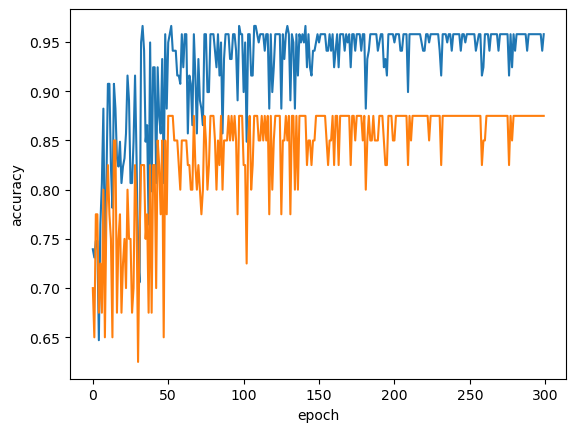

In [22]:
import matplotlib.pyplot as plt
plt.plot(train_score) # 훈련 세트 정확도
plt.plot(test_score) # 테스트 세트 정확도
plt.xlabel("epoch")
plt.ylabel("accuracy")
plt.show()

In [27]:
sc = SGDClassifier(loss='log_loss', max_iter=55, tol=None) # tol - 0.01 기본값, 0.01 만큼 정확도가 향상이 안돼면 종료, None 종료1
sc.fit(train_scaled, train_target)

print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))

0.957983193277311
0.85
